In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# INTRODUCTION
-  (Our aim in this kernel is to classify the orthopedic patients using the K Nearest Neighborhood algorithm (KNN) using their biomedical features.)
- Bu kernelde amacımız: biomedikal featurelerini kullanarak ortopedik hastalar için K Nearest Neighborhood (KNN) algoritması ile sınıflandırma yapmaktır.
- KNN algoritmasından bahsedecek olursak:

        KNN algoritması bir sınıflandırma algoritmasıdır. Yapacağı işlem temel olarak verilen gözlem noktalarının
        hangi sınıfa ait olduğunu belirlemektir.
        Hangi sınıfa ait olduğunu belirlemek için train(öğrenme) veri setinde yer alan noktaların uzaklıklarını (distances)referans alarak sınıflandırma işlemi yapar. Test veri setinde yer alan noktalar ile öğrenme veri setinde yer alan noktaların birbirlerine olan uzaklıkları hesaplanır. En yakın K adet uzaklık belirlenir. Belirlenen K adet uzaklıklara ait gözlem noktalarının sınıf etiketleri (class label) kıyaslanır. 
        Örnek verecek olursa 3 adet gözlem noktasının sınıf etiketlerinin "abnormal", "normal", "abnormal" olduğunu varsayalım. Hangi sınıfa ait olduğunu belirlemek için unique sınıf değerlerinin count değerine bakılır, yani 2 adet "abnormal", 1 adet "normal" etiket bulunduğuna göre test veri setinde yer alan ilgili gözlemin yeni sınıf değeri "abnormal" olarak belirlenir.
        Bu işlem tüm test veri setindeki her gözlem noktasına uygulanarak her bir gözlemin sınıf değeri tahmin edilir.
        Yapılan tahmin işleminin doğruluğunu sınamak için Mean Square Error (MSE) tekniği kullanılır. MSE değerini en az indirgemek hedeftir.
  **Hangi K parametresinin en iyi sonucu vereceği bilinmemektedir. K parametresi bir hyper parameter'dir. Yani model kurulduktan sonra hangi k değeri en iyi sonucu verecek denenerek bulunabilir.**

1.) [Data Info](#1)<br>
2.) [Data Visualization](#2)<br>
3.) [Determination and Seperation of Data](#3)<br>
4.) [Data Normalization](#4)<br>
5.) [Train Test Split](#5)<br>
6.) [create model KNN](#6)<br>
7.) [Accuracy Visualize](#7)<br>
8.) [Conclusion](#8)<br>




<a id="1"> </a>
# Data Info

In [5]:
data = pd.read_csv("column_3C_weka.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [3]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


    Yapılacak sınıflandırma işleminde
    test veri setinde yer alan gözlem noktalarının aşağıda yer alan hastalık türlerinden
    hangisine sahip olduğu tahmin edilecektir.
    Normalde test veri seti dataset'in kendisinden türediği için:
    Class labellarıda bellidir fakat biz tahminlerimiz ile gerçekte olan sonuçları kıyaslayarak
    kurduğumuz modelin doğruluğunu ve hata payını ortaya çıkaracağız.
    
    -------------------------------------------------------------------------------------
       
    In the classification process to be made
    One of the disease types listed below is the observation points in the test dataset.
    which one will be guessed.
    Normally, since the test dataset is derived from dataset itself:
    Class labels are also obvious, but by comparing our estimates with the actual results
    We will reveal the accuracy and margin of error of the model we have installed.

In [4]:
data['class'].value_counts()
# Class label1 = Spondylolisthesis (Ortopedi bir hastalık türü)
# Class label2 = Normal
# Class label3 = Hernia (Fıtık hastalığı)

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

<a id="2"> </a>
# Data Visualization

In [5]:
spl = data[data['class'] == 'Spondylolisthesis']
normal = data[data['class'] == 'Normal']
hernia = data[data['class'] == 'Hernia']

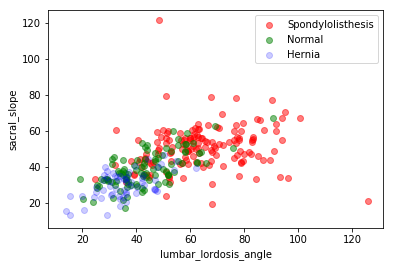

In [6]:
# Scatter plot
plt.scatter(spl.lumbar_lordosis_angle, spl.sacral_slope, label="Spondylolisthesis",color="red",alpha=0.5)
plt.scatter(normal.lumbar_lordosis_angle, normal.sacral_slope, label="Normal",color="Green",alpha=0.5)
plt.scatter(hernia.lumbar_lordosis_angle, hernia.sacral_slope, label="Hernia",color="Blue",alpha=0.2)
plt.xlabel("lumbar_lordosis_angle")
plt.ylabel("sacral_slope")
plt.legend()
plt.show()

<a id = "3"> </a>
# Determination and Seperation of Data

In [7]:
# Normal = 0   , Spondylolisthesis = 1, Hernia=2
data['class'] = [0 if each == "Normal" else 1 if each == "Spondylolisthesis" else 2 for each in data['class']]

y = data['class'].values
x_data = data.drop(['class'],axis=1)
x_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


<a id="4" > </a>
# Data Normalization


![a](https://i.hizliresim.com/m3ppNz.png)


In [8]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


<a id ="5" ></a>
# Train Test Split

    Train test split sklearn kütüphanesinin bir modülüdür.
    Bu modül ile veri seti öğrenme veri seti, öğrenme veri seti etiketi, test veri seti ve test veri seti etiketleri olmak üzere 4 değişkene bölümlenebiliyor.
    Bölümleme işleminde parametreleri incelersek, x öğrenme veri setini (train_dataset), 
    y test veri setini (test_dataset), test_size ise data setinin kaçta kaçını test için kullanılacağını belirleyen parametrelerdir.
    random_state parametresine verdiğimiz rastgele bir değerle de her split etme işleminde birinci seferde oluşan random grubunun birdahaki seferlerde de aynı şekilde olmasını istediğimizi belirtiyoruz.
    Yani random_state'e verilen değeri index olarak düşünürsek bu modül 2. kez kullanılırsa index'imizi bakarak yine aynı x_öğrenme, x_test, y_öğrenme, y_test dörtlemesini karşımıza çıkaracaktır. Değerler değiştirilmeden bu sayede alacağımız MSE ve başarı skorları değişmeyecektir.
    
    dataset'de yer alan verilerin %40'ı test için, %60'ı ise öğrenim için kullanılacak.
    
 ----------------------------------------------------------------------------------------------------------------
 
     The train test is a module of the split sklearn library.
    With this module, the data set can be divided into 4 variables: learning data set, learning data set label, test data set and test data set options.
    If we examine the evaluation in the segmentation process, x learning data set (train_dataset),
    y is the test dataset (test_dataset), and test_size are parameters that determine how many of the dataset will be used for testing.
    It is done in the same way the next time of the random group formed in the first time in its split operation with a random value we give to the random_state parameter.
    In other words, if we consider this value as the value index given to random_state, you can see the same x_ learning, x_test, y_ learning, y_test quadrances by using our index. MSE and success scores will not change.

    40% of dataset is required for testing and 60% for learning.

In [9]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1)

<a id="6" > </a>
# Create Model KNN
    Sklearn kütüphanesinin neighbours modülünü importla başladık
    n_neighbors yani K parametremizi belirledik.
    modelimize x_train ve y_train yani öğrenme veri seti ve etiketlerini vererek eğittik,öğrettik.
    test veri setinde yer alan gözlemleri modelimizi kullanarak tahmin ettik.
    ----------------------------------------------------------------------------   
    We started importing the neighbors module of the Sklearn library
    We have determined our n_neighbors, K parameter.
    We trained and taught x_train and y_train, that is, learning data set and tags.
    using the ground observations model in the test data set.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [11]:
prediction

array([1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0])

In [12]:
print("{} nn score: {} ".format(3,knn.score(x_test,y_test))) #k = hyper parameter

3 nn score: 0.7338709677419355 


<a id="7" ></a>
# Accuracy Visualize
    
    Modelimizin Doğruluk değerlerinin görselleştirmesi için izlediğimiz yol:
    k parametresi için 1 ile 50 arasında değerler vererek toplam'da 50 kez eğiterek
    50 çalışma sonucu oluşan score değerlerini score_list dizesine aktardık.
    Daha sonra bu değerleri plot ettik.
    ----------------------------------------------------------------------
    
    The way we follow to visualize the accuracy values ​​of our model:
    By giving values ​​between 1 and 50 for the k parameter, by training 50 times in total
    We transferred the score values ​​of 50 studies to score_list string.
    Then we plotted these values.

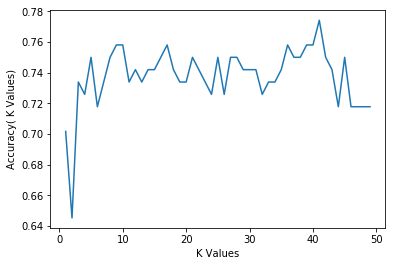

In [13]:
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each) # n_neighbors = k
    knn2.fit(x_train,y_train)
    knn2.score(x_test,y_test)
    score_list.append(knn2.score(x_test,y_test))
plt.plot(range(1,50),score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy( K Values)")
plt.show()

<a id="8"></a>
# Conclusion

In [14]:
max_accuracy_value= max(score_list) # what is max score value ?
max_accuracy_k = score_list.index(max_accuracy_value)+1   # what is hyper parameter(k) value for max score ?
print("for max score ==> k={},score={}".format(max_accuracy_k,max_accuracy_value))

for max score ==> k=41,score=0.7741935483870968
